In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [14]:
df = pd.read_csv('./selected_indicators/OZD_raw.csv')
df_new =  (
    df.drop(['code', 'iso'], axis=1)
    .set_index(['country']).rename_axis([None])
    .T.reset_index() # Transpose teh original dataset 
    .assign(index=lambda x: x['index'].str[-4:])
    .set_index('index')
    .rename_axis(None)
    .replace(-8888, np.nan)
)

df_new

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
1990,127.584497,72.437831,44.920855,33.874596,85.200218,NaN,2.835080,11.911703,71.280844,NaN,...,6.466984,77.531937,8.723979,10.190658,18.401312,NaN,NaN,40.054618,30.149849,11.923627
1991,121.370976,66.101333,44.999013,33.219205,88.378382,NaN,3.082792,11.733400,69.413800,NaN,...,5.975882,75.749955,9.501763,10.317384,19.412202,NaN,NaN,36.914594,33.850781,12.683462
1992,114.668869,61.161416,42.653435,31.543775,80.830592,NaN,3.182657,11.663185,70.179182,NaN,...,6.388219,74.185898,10.208558,10.246548,20.488243,NaN,NaN,34.438807,29.997661,11.127198
1993,113.526423,58.095853,43.381535,32.923401,80.410633,NaN,3.637924,11.629019,71.035280,NaN,...,6.853534,78.004795,11.030105,10.624472,21.072493,NaN,NaN,33.616592,28.127190,9.960251
1994,117.783663,54.149998,42.590885,36.116718,73.555789,NaN,3.513581,12.158305,69.114430,NaN,...,7.091965,85.511710,10.576760,12.116697,21.738449,NaN,NaN,33.555906,24.269842,8.814100
1995,121.895790,50.398004,44.504801,40.796754,71.938622,NaN,3.765690,12.422714,69.405600,NaN,...,7.861716,90.790764,10.290292,13.326378,22.367000,NaN,NaN,33.854797,27.651918,10.082594
1996,121.144654,45.275710,42.172161,39.242251,65.992350,NaN,3.334616,12.299821,64.281603,NaN,...,8.025720,91.596368,9.012584,13.023097,21.407441,NaN,NaN,31.012480,29.357198,9.876874
1997,122.355207,44.502440,41.034781,36.035715,66.247254,NaN,3.528749,11.371193,57.153750,NaN,...,8.048701,87.468707,8.277263,12.031225,23.794326,NaN,NaN,31.327945,34.727966,10.311098
1998,125.658693,38.262731,38.060642,33.778808,66.448880,NaN,2.505535,12.629882,53.663278,NaN,...,9.188679,85.541540,7.384569,13.050442,22.583853,NaN,NaN,31.835959,33.713069,9.512241
1999,133.619247,32.233163,46.627387,34.936919,67.898761,NaN,2.113332,12.508906,55.622315,NaN,...,9.285536,84.598144,6.101712,13.162216,21.555253,NaN,NaN,38.721313,34.511141,10.224476


In [15]:
selected_countries = ['United States of America', 'China', 'India', 'Germany', 'South Africa', 'Australia', 'Brazil'] 
selected_df = df_new.loc[:, selected_countries]
selected_df

,United States of America,China,India,Germany,South Africa,Australia,Brazil
1990,47.617915,280.555234,246.260558,17.615625,16.830669,4.583021,20.276053
1991,46.154956,272.935650,247.980873,18.572089,18.111094,3.976970,19.021724
1992,45.948257,280.026444,243.682595,18.254858,19.516692,3.252737,19.528477
1993,47.211380,277.509310,245.954435,20.877418,19.309706,3.130720,20.029737
1994,51.062504,282.599982,244.595821,20.802281,19.048034,2.959445,21.638138
1995,52.445015,276.734234,248.327732,20.429514,18.621612,3.120353,21.370290
1996,52.551374,274.008366,249.967659,18.958750,19.685612,3.272493,21.595648
1997,55.037044,274.068191,269.701160,17.325168,22.388161,3.466899,21.104543
1998,58.936897,256.718200,276.078689,17.974125,23.420566,3.430431,22.372804
1999,60.594782,260.558188,285.162652,16.643803,24.833723,3.295843,21.380805


In [16]:
df_long = (selected_df.reset_index()
           .melt(id_vars='index', var_name='country', value_name='value')
           .astype({'index': 'float64'}))
df_long

,index,country,value
0,1990.0,United States of America,47.617915
1,1991.0,United States of America,46.154956
2,1992.0,United States of America,45.948257
3,1993.0,United States of America,47.211380
4,1994.0,United States of America,51.062504
...,...,...,...
205,2015.0,Brazil,18.858433
206,2016.0,Brazil,20.514179
207,2017.0,Brazil,18.573913
208,2018.0,Brazil,25.150813


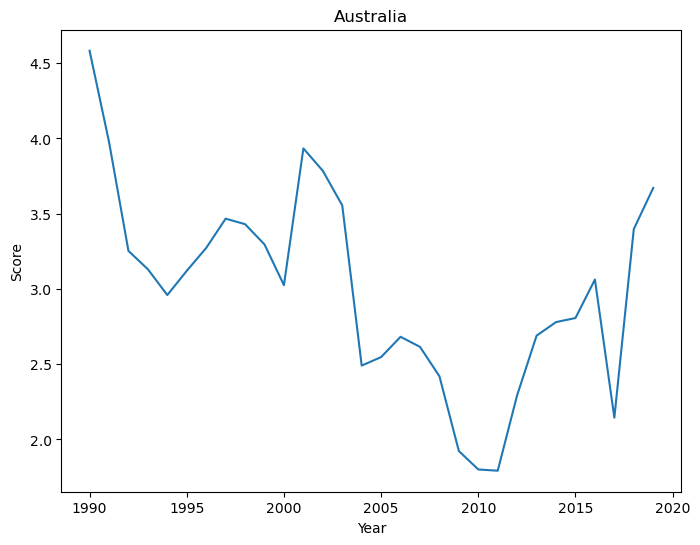

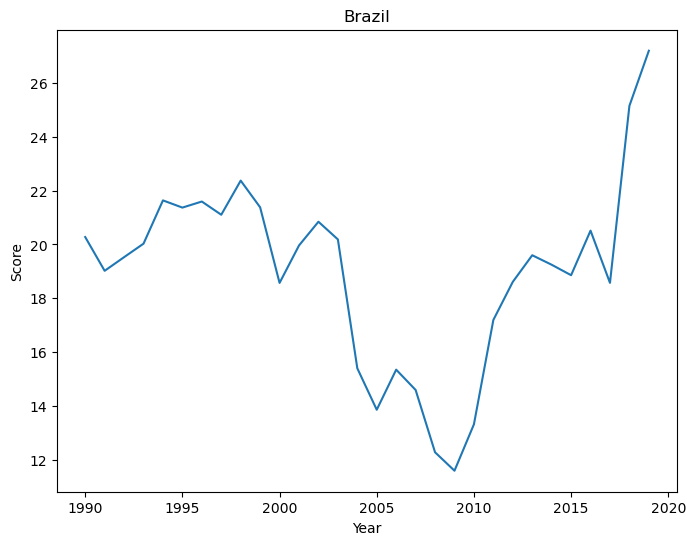

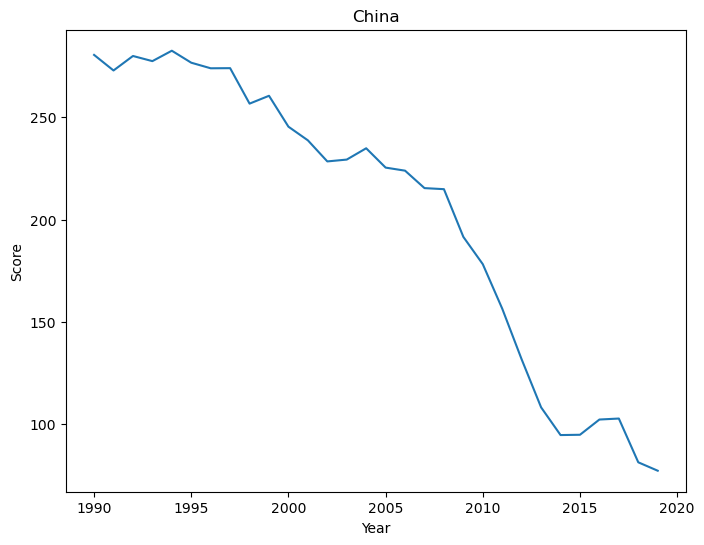

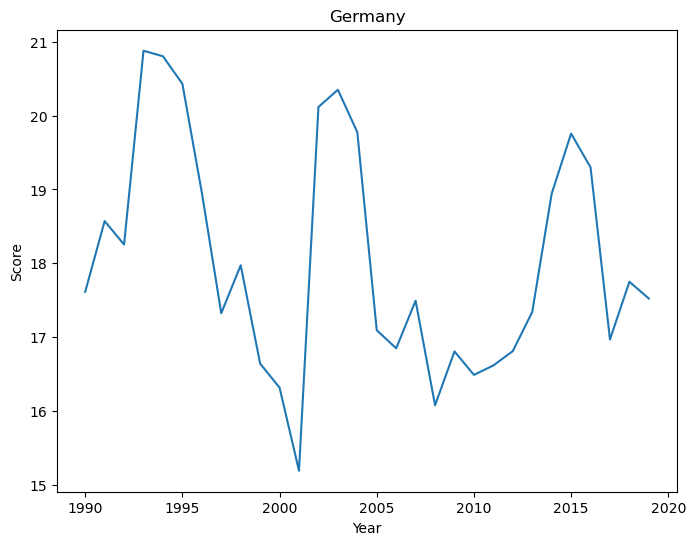

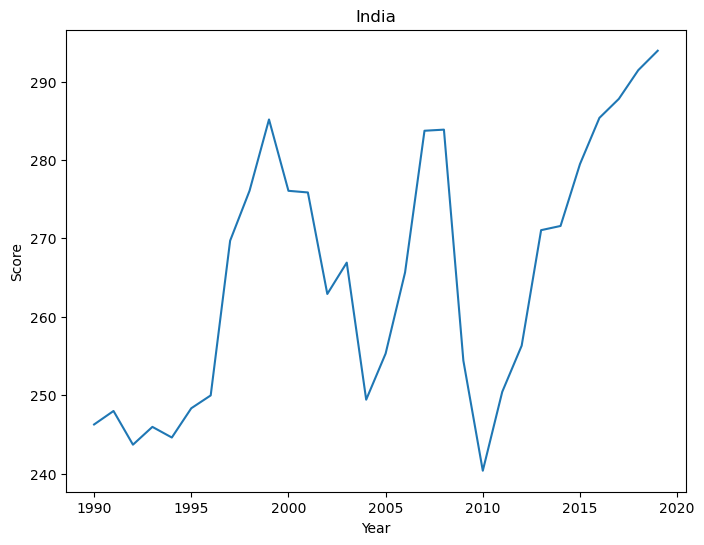

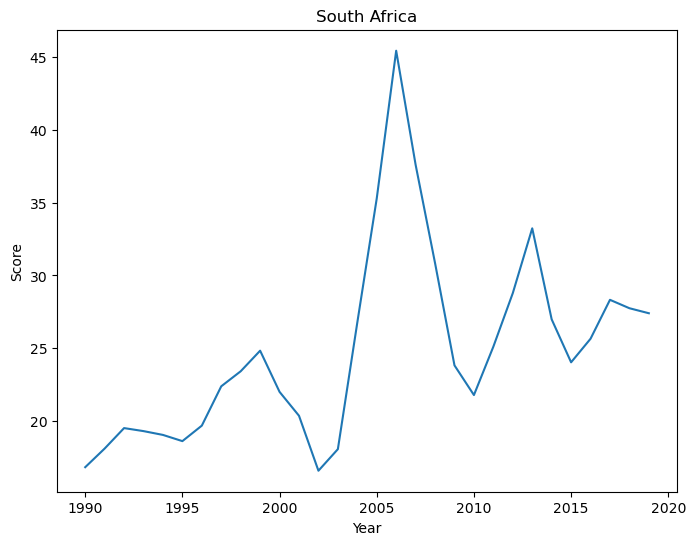

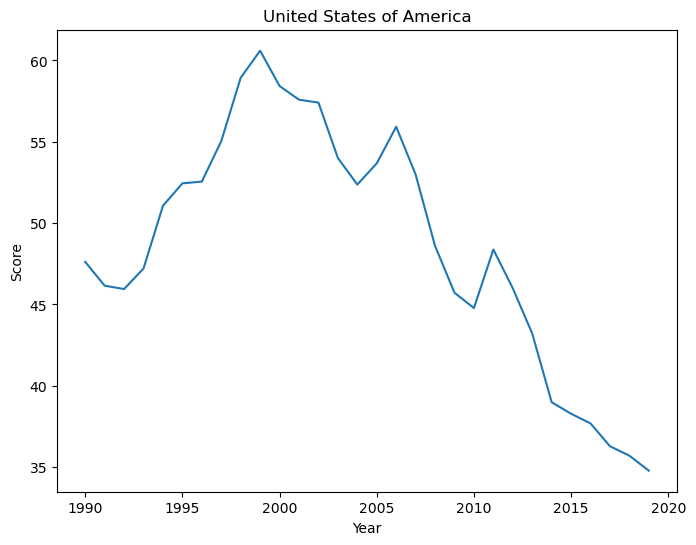

In [17]:
for country, data in df_long.groupby('country'):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    ax.plot(data['index'], data['value'], label=country)
    ax.set_title(country)
    ax.set_xlabel('Year')
    ax.set_ylabel('Score')

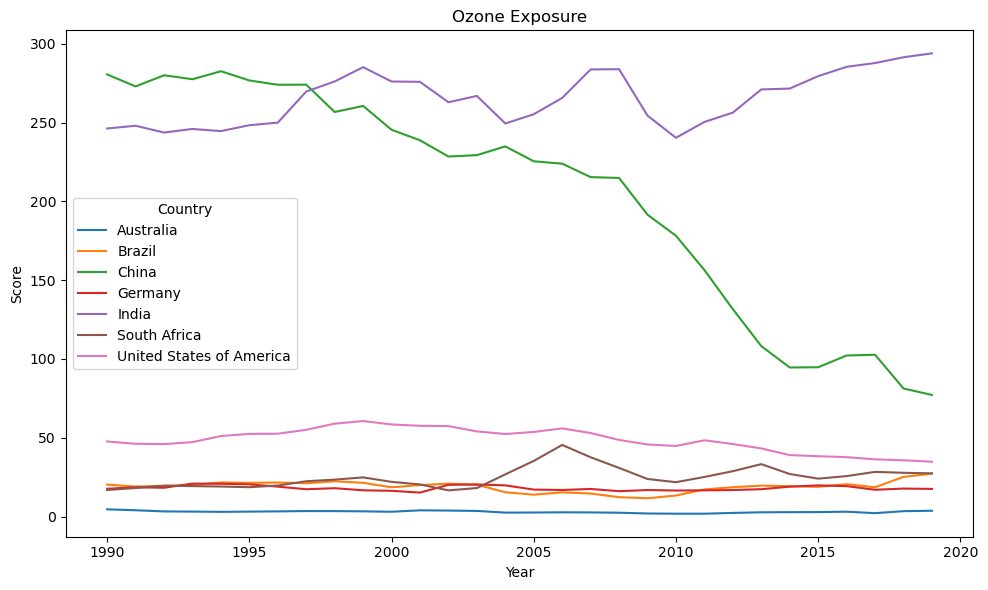

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

for country, data in df_long.groupby('country'):
    ax.plot(data['index'], data['value'], label=country)

ax.set_title('Ozone Exposure')
ax.set_xlabel('Year')
ax.set_ylabel('Score')
ax.legend(loc='best', title='Country') 

fig.tight_layout()
plt.savefig("OZD.png")
plt.show()